# <span style="color:#0077b6">  Summary<a name="summary_1"></a></span> 

The COVID-19 pandemic has had a profound impact on the world, leading to significant changes in our daily lives, economies, and healthcare systems. To gain insights into the dynamics of this global crisis, we conducted a comprehensive data analysis using five diverse datasets: `df_country`, `df_covid`, `df_day`, `df_world`, and `df_fgroup`. In this analysis, we will provide an overview of our findings and key takeaways.

# <span style="color:#0077b6">Ask Phase<a name="ask_phase_2"></a></span>

### Business Task<a name="business_task_2_1"></a>

Our primary business task was to analyze the COVID-19 pandemic's impact, with a focus on understanding how different countries and regions were affected. This analysis aimed to provide insights into:

1. The overall spread of COVID-19 worldwide.
2. Variations in the number of confirmed, recovered, and deceased cases across countries and regions.
3. The relationship between government responses, healthcare infrastructure, and pandemic outcomes.
4. Temporal trends, including how the pandemic evolved over time.

To accomplish these tasks, we leveraged the five datasets mentioned earlier, each contributing unique dimensions to our analysis.

# <span style="color:#0077b6">Prepare Phase<a name="prepare_phase_3"></a></span>


### Dataset Used<a name="dataset_used_3_1"></a>

1. **df_country**: This dataset contains information about individual countries, including demographics, healthcare infrastructure, and government responses. It provides a broad context for our analysis.

2. **df_covid**: This dataset offers daily records of COVID-19 cases, including the number of confirmed, recovered, and deceased cases. It also includes geographical details, enabling us to perform spatial analyses.

3. **df_day**: Focusing on daily records, this dataset allows us to track the pandemic's progression over time. It provides valuable insights into temporal trends.

4. **df_world**: This dataset aggregates COVID-19 data at the global level, summarizing key metrics for the entire world. It offers a high-level perspective.

5. **df_fgroup**: This dataset classifies countries into specific groups, facilitating comparative analyses among countries with similar characteristics.

### Accessibility and Privacy of Data<a name="accessibility_and_privacy_of_data_3_2"></a>


We ensured that the data used in this analysis adhered to privacy and accessibility guidelines. All datasets were publicly available and did not contain sensitive or personally identifiable information.

### Information About Our Dataset<a name="information_about_our_dataset_3_3"></a>


Our datasets provided a comprehensive view of the COVID-19 pandemic. They included information on confirmed cases, deaths, recoveries, government responses, and demographic factors. By combining these datasets, we gained a holistic understanding of the pandemic's impact.

### Data Organization and Verification<a name="data_organization_and_verification_3_4"></a>


We organized and cleaned the datasets to ensure data integrity. This included handling missing values, standardizing date formats, and verifying data consistency. We also conducted exploratory data analysis (EDA) to identify patterns and outliers.

### Data Credibility and Integrity<a name="data_credibility_and_integrity_3_5"></a>

We considered the credibility of the data sources used. These datasets originated from reputable sources such as health organizations, governments, and research institutions. We also assessed data integrity by cross-referencing information and performing data validation checks.

In the next phases of our analysis, we will delve deeper into each dataset, perform statistical analyses, create visualizations, and draw meaningful insights to address our business task effectively. Stay tuned for more detailed findings and visualizations in the subsequent sections of our analysis.

The **COVID-19 pandemic** has reshaped the world in unprecedented ways. To better understand the dynamics of this global crisis, we embarked on a comprehensive data analysis journey, harnessing the power of five diverse datasets: **df_country, df_covid, df_day, df_world, and df_fgroup**. In this analysis, we share our insights and findings from this in-depth exploration

# <span style="color:#0077b6"> Process phase<a name="process_phase_4"></a></span> 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import IFrame
import plotly.express as px
from IPython.display import display
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

## Step:1) Reading the data

In [6]:
df_covid = pd.read_csv("covid_19_clean_complete.csv")
df_country = pd.read_csv("country_wise_latest.csv")
df_day = pd.read_csv("day_wise.csv")
df_fgroup = pd.read_csv("full_grouped.csv")
df_world = pd.read_csv("worldometer_data.csv")

all_dfs = [df_covid, df_country, df_day, df_fgroup, df_world]
for df in all_dfs:
    print(f'-----------{df.head()}-----------\n\n\n\n\n')

-----------  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  -----------





-----------  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1

## Step:2 ) Inspecting the data
### Pre-processing


In [10]:
## Inspecting the shape 
df_covid.shape


(49068, 10)

In [11]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [12]:
df_covid.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


There are some variables which have significantly high max or low min values compared to their mean. We will be ploting box plot to see the distributions after we merge df_country and df_covid

**Checking missing values & handling them**

In [13]:
df_fgroup.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [14]:
df_country.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [15]:
df_covid.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [16]:
# the column "Province/state doesnt have effect on the target and so we will fill with either 0 or just keeping spaced
df_covid['Province/State'] = df_covid['Province/State'].fillna('')
df_covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [17]:
df_world.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [18]:
# handling all numerical missing values by filling them with 0
happening = ['NewCases','NewDeaths','NewRecovered','Serious,Critical','TotalDeaths','Tests/1M pop','Deaths/1M pop', 'TotalTests','ActiveCases','TotalRecovered']
df_world[happening] = df_world[happening].fillna(0)
#handling the region names missing values by filling them with ''
df_world['WHO Region'] = df_world['WHO Region'].fillna('')
df_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [19]:
df_day.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [20]:
# changing the format of date
df_fgroup["Date"] = pd.to_datetime(df_fgroup["Date"], format = "%Y-%m-%d")
print(df_fgroup.info())
df_day["Date"] = pd.to_datetime(df_day["Date"], format= "%Y-%m-%d")
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                 

**Checking the duplicates**

In [22]:
df_covid.duplicated().sum()

0

In [23]:
df_country.duplicated().sum()

0

In [24]:
df_day.duplicated().sum()

0

In [25]:
df_fgroup.duplicated().sum()

0

In [26]:
df_world.duplicated().sum()

0

As there are no duplicate rows, we can initiate our next sequence which is **merging for a better analysis & visulization**

## Step:3) Merging the data for data integrity

In [27]:
#finding the common columns in between the two datasets that we'd be analysing
covid_columns = set(df_covid.columns)
country_columns = set(df_country.columns)
common_columns = covid_columns & country_columns
print(common_columns)


{'Recovered', 'Deaths', 'WHO Region', 'Confirmed', 'Active', 'Country/Region'}


In [28]:
commons = ['WHO Region', 'Recovered', 'Country/Region', 'Deaths', 'Active', 'Confirmed']
merged_covcountry = pd.merge(df_covid, df_country, on=commons, how='inner')
merged_covcountry.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,,Timor-Leste,-8.874217,125.727539,2020-04-24,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
1,,Timor-Leste,-8.874217,125.727539,2020-04-25,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
2,,Timor-Leste,-8.874217,125.727539,2020-04-26,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
3,,Timor-Leste,-8.874217,125.727539,2020-04-27,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
4,,Timor-Leste,-8.874217,125.727539,2020-04-28,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0


**Checking outliers for the merged dataframe**

C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_11320\745855115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_covcountry[allcases], orient='h', palette='Set2', color = 'r')


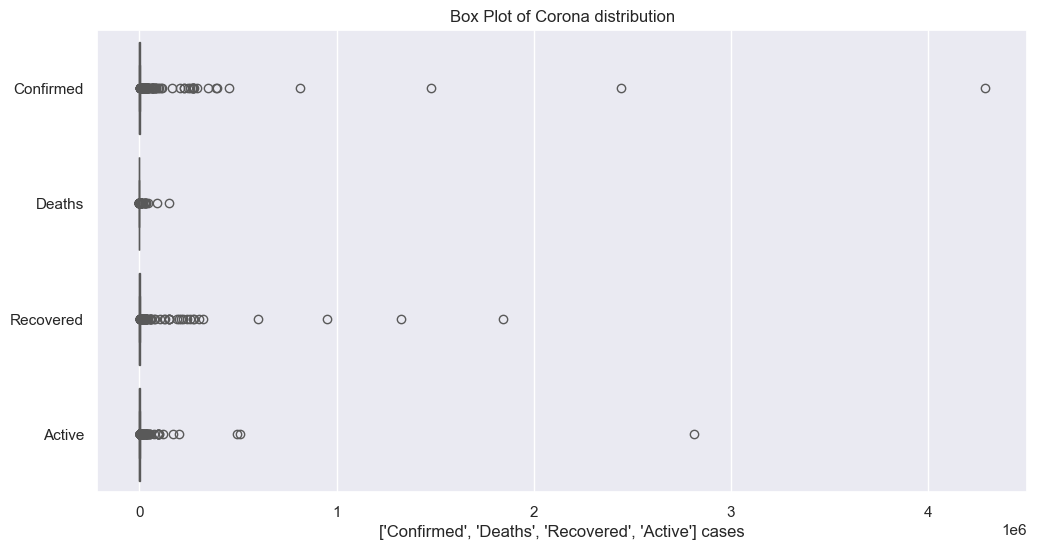

In [32]:
# Ploting box plot for Confirmed
import seaborn as sns
sns.set(style="darkgrid")  
allcases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
# Create a box plot for every cases
plt.figure(figsize=(12, 6))  
sns.boxplot(data=merged_covcountry[allcases], orient='h', palette='Set2', color = 'r')


# Add labels and title (optional)
plt.xlabel(f'{allcases} cases')
plt.title('Box Plot of Corona distribution')

# Show the plot
plt.show()

**Insights**

- It has been seen that there are meaningless outliers for all the cases that ranges outside of the whiskers but the outliers scattering nearer to the whiskers could be handled and I'd initiate in next steps

# <span style="color:#0077b6">Analyze and Share Phase<a name="asp"></a></span>

## Step:4) Checking our target through vizzes\

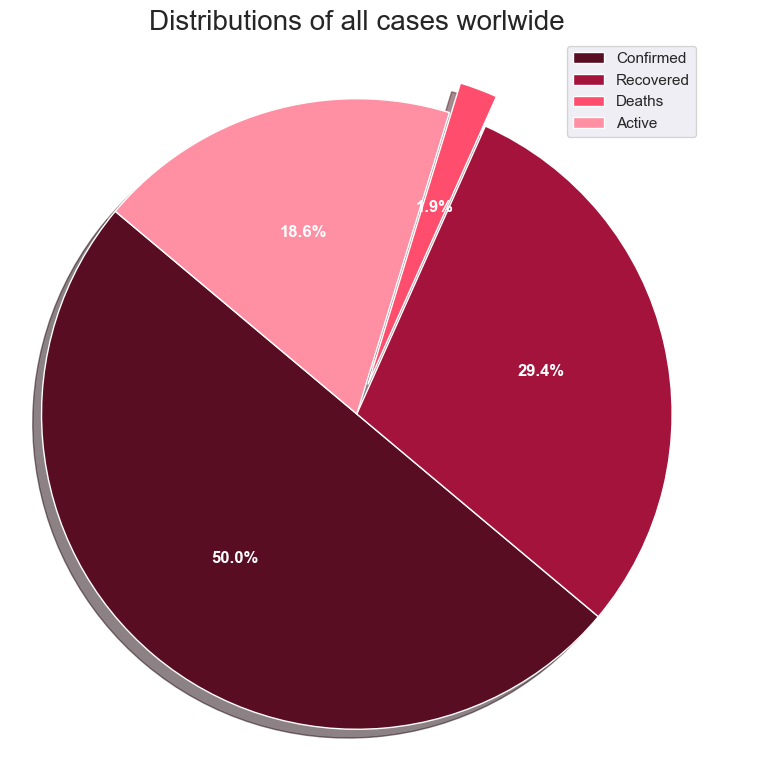

In [34]:
df_intotalcases = merged_covcountry[['Confirmed','Recovered', 'Deaths', 'Active']].sum()
label = ['Confirmed','Recovered', 'Deaths', 'Active']
color_scale = ['#590d22','#a4133c','#ff4d6d','#ff8fa3']

plt.figure(figsize = (8,8))
plt.pie(df_intotalcases, labels = label, autopct = '%1.1f%%', explode = (0,0,0.1,0) ,colors = color_scale, startangle = 140, shadow = True, textprops={'color': 'white','weight': 'bold'})
plt.title("Distributions of all cases worlwide", fontsize = 20)

plt.axis('equal')



plt.legend()
plt.tight_layout()
plt.show()

Here, we will see the cases that were existing throughout the time

**Insights**
- It's seen that half of the cases are of from "confirmed" which tells us that the world is in an outspread of corona disease and massive amounts of treatments and quarantines are needed to increase the percentage of "recovered" cases. 
- However, death rate had been the least among all the cases but 1.9% out of 8,045,311,447 people in this world is too much, that's almost as if 152,860,917 were killed by this disease. 
- We need to take immediate measures to lessen these death rate and send help to what country/region needs the most. T

In [55]:
# Group and melt the DataFrame
case_time = df_fgroup.groupby('Date')[['Confirmed', 'Recovered', 'Deaths', 'Active']].sum().reset_index()
case_time = case_time.melt(id_vars="Date", value_vars=['Confirmed', 'Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')

# Create the area plot
fig = px.area(case_time, x="Date", y="Count", color='Case', height=600, width=700,
             title='Cases over time', color_discrete_sequence=['#780000', '#cdb4db','#fb8500', '#06d6a0'])
fig.update_layout(xaxis_rangeslider_visible=True)
# Save the figure to an HTML file
fig.write_html('plotly_figure.html')

# Display the HTML file in the notebook
from IPython.display import IFrame
IFrame(src='./plotly_figure.html', width=800, height=600)

**By taking the above insights on the above graph, we'll implement all following graphs to analyse which country needs the most health equipments to lessen the death rate**

- So, plotting a pie chart on confirmed cases in a descending manner

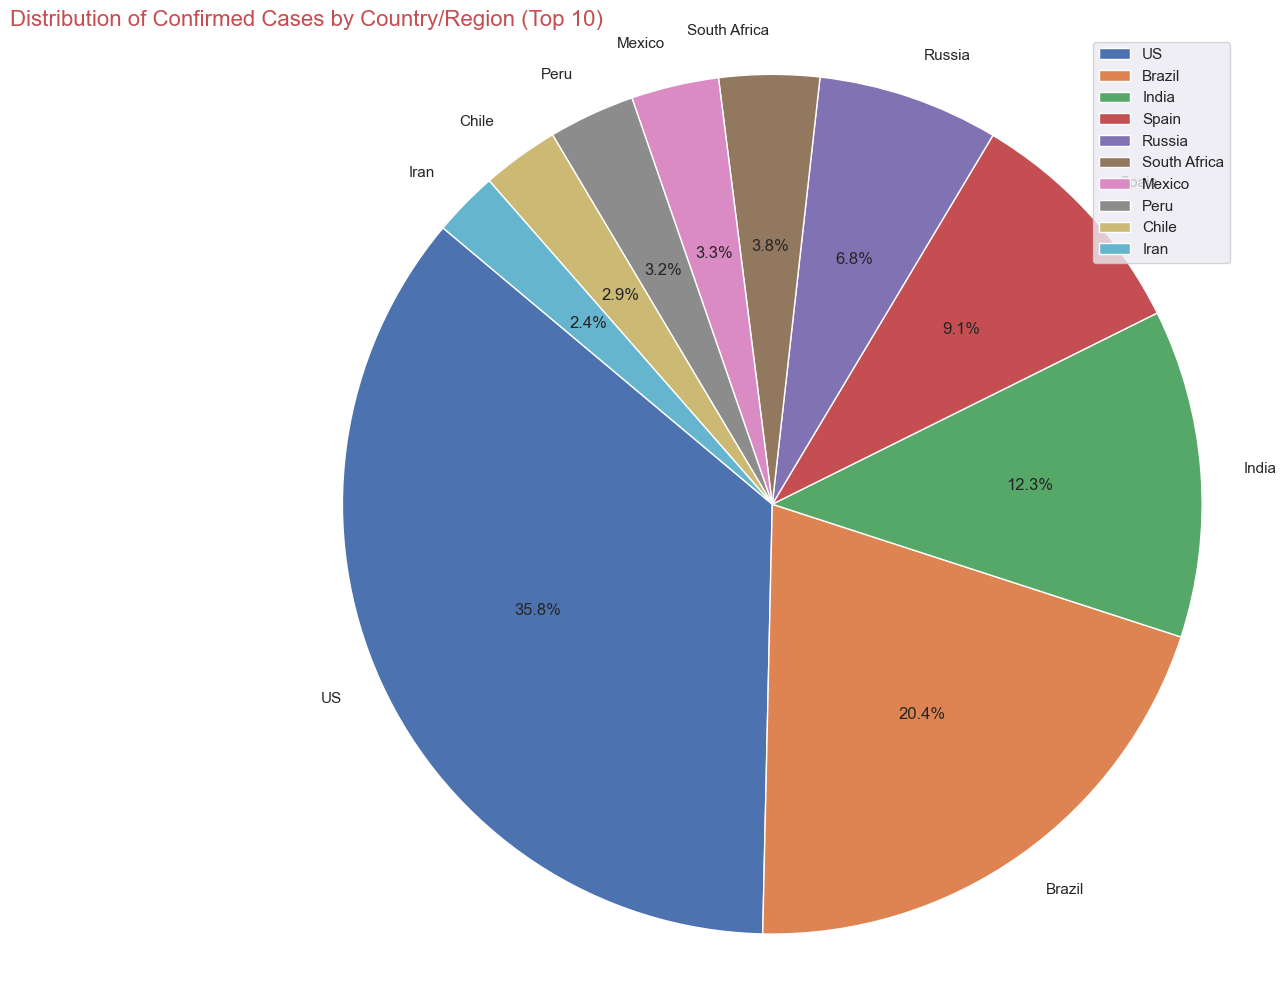

In [42]:
# Calculating the sum of Confirmed cases for each country and select the top 10
country_totals = merged_covcountry.groupby('Country/Region')['Confirmed'].sum().nlargest(10)

# Creating a pie chart
plt.figure(figsize=(10,10))
plt.pie(country_totals, labels=country_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Confirmed Cases by Country/Region (Top 10)', fontsize = 16, color='r', loc='left', horizontalalignment='center')
plt.axis('equal')  

# Showing the pie chart
plt.legend()
plt.tight_layout()
plt.show()


**Insights**
- It has been seen that the majority of confirmed cases prevail in US at 35.8% and it's in a worse state and in need of immediate measures and quarantines. Thus we can infer that they have higher chances of not able to be recovered simulatenously as the whole world is in need of healthcare as well.

## Step:6) Checking all about recovered cases

**Analysis on Recovered cases**

In [43]:
'''merged_covcountry['Date'] = pd.to_datetime(merged_covcountry['Date'], format='%Y-%m-%d')
covid19_new = pd.merge(merged_covcountry, df_fgroup , on = 'Date', how = 'inner')
covid19_new.sample(n=6)'''

"merged_covcountry['Date'] = pd.to_datetime(merged_covcountry['Date'], format='%Y-%m-%d')\ncovid19_new = pd.merge(merged_covcountry, df_fgroup , on = 'Date', how = 'inner')\ncovid19_new.sample(n=6)"

In [44]:
df_target_recover = df_fgroup.groupby('Country/Region')['Recovered'].sum().reset_index()
df_target_recover.sort_values(by = 'Recovered', ascending = False).head()

,Country/Region,Recovered
173,US,56353416
23,Brazil,54492873
138,Russia,25120448
79,India,23783720
65,Germany,17107839


**Sum of recovered cases country wise per date**

In [45]:
df_fgroup.groupby(['Country/Region', 'Date'])['Recovered'].transform('sum')

0           0
1           0
2           0
3           0
4           0
         ... 
35151    3752
35152       8
35153     833
35154    2815
35155     542
Name: Recovered, Length: 35156, dtype: int64

- **Here, I will do analysis on US about the recovery rates as half of the percentages of selected populations are infected with covid-19 there**

In [46]:
us_cases = df_fgroup[df_fgroup['Country/Region'] == 'US'].groupby('Country/Region')[['Confirmed', 'Recovered', 'Deaths', 'Active']].sum().reset_index()
us_cases

,Country/Region,Confirmed,Recovered,Deaths,Active
0,US,224345948,56353416,11011411,156981121


Text(0, 0.5, 'Number of Cases')

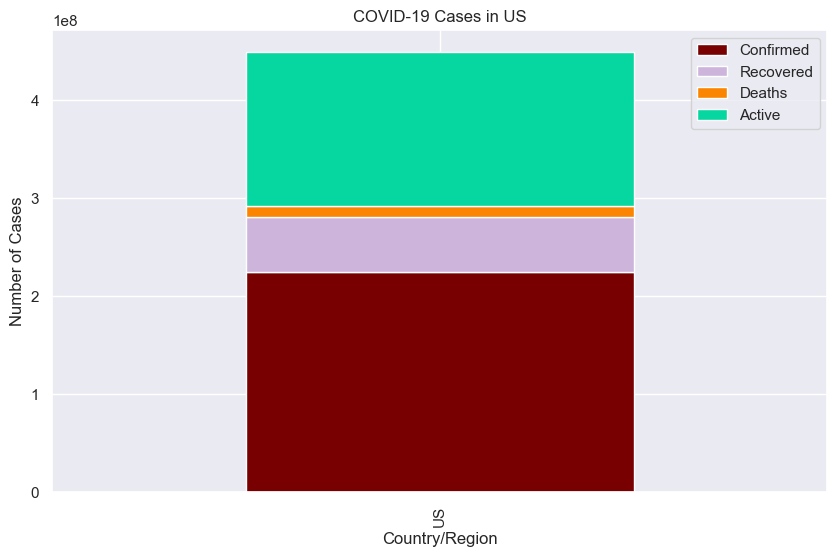

In [47]:
# Set the 'Country/Region' column as the index
us_cases.set_index('Country/Region', inplace=True)
pp = ['#780000', '#cdb4db','#fb8500', '#06d6a0']
# Plot a stacked bar chart
ax = us_cases[['Confirmed','Recovered', 'Deaths', 'Active']].plot(kind='bar', stacked=True, figsize=(10, 6),color = pp )

# Customize the plot
plt.title('COVID-19 Cases in US')
plt.xlabel('Country/Region')
plt.ylabel('Number of Cases')

## Step:7) Visualizations and Analysis of all cases over the world

Creating a visualization out of **merged covid and countrywise dataset** and analysing on it

In [54]:
# Visualizing confirmed cases worldwide
#grouping country/region wise confirmations
confirmed_cases = pd.DataFrame(merged_covcountry.groupby('Country/Region')['Confirmed'].sum())

# i have to include country/region to make the 'Country/Region' column more accessible. 
confirmed_cases['Country/Region'] = confirmed_cases.index
df_confirmedcases = confirmed_cases[['Country/Region','Confirmed']]
# Creating a gradient color scale
color_scale = px.colors.sequential.Reds

#plotting
fig = px.bar(df_confirmedcases.sort_values('Confirmed',ascending=False)[:20][::-1], #sorting by confirmed column and taking 20 but desc
             x='Confirmed',
             y='Country/Region',
             title='Confirmed Cases Worldwide',
             color_continuous_scale=color_scale,# Apply the gradient color scale
             color = 'Confirmed',
             text='Confirmed', #printing out the Confirmed column where the sum of confirmed cases are prevalent in bars
             height=900, 
             orientation='h')
pyo.iplot(fig)


In [61]:


def plot_map(df, col, pal):
    df = df[df[col] > 0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
    fig.update_layout(coloraxis_showscale=False)
    
    # Save the figure to an HTML file
    fig.write_html('plotly_choropleth.html')
    
    # Display the HTML file in the notebook
    return IFrame(src='./plotly_choropleth.html', width=800, height=600)

# Call the function
plot_map(merged_covcountry, 'Confirmed', 'Reds')



**Visualizations of other target features over the time globally**

In [62]:
case_index = df_fgroup.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
case_index.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [70]:


# Creating subplots of cases that we need to analyze further
fig = make_subplots(rows=1, cols=4, subplot_titles=("Confirmed", "Deaths", "Recovered", "Active"))

# Using plotly's graph object for each case to show
case1 = go.Scatter(
    x=case_index['Date'],
    y=case_index['Confirmed'],
    name="Confirmed",
    line_color='#590d22',
    mode='lines+markers',
    opacity=0.8
)

case2 = go.Scatter(
    x=case_index['Date'],
    y=case_index['Deaths'],
    name="Deaths",
    line_color='#c9184a',
    mode='lines+markers',
    opacity=0.8
)

case3 = go.Scatter(
    x=case_index['Date'],
    y=case_index['Recovered'],
    name="Recovered",
    mode='lines+markers',
    line_color='#ff758f',
    opacity=0.8
)

case4 = go.Scatter(
    x=case_index['Date'],
    y=case_index['Active'],
    name="Active",
    line_color='#fff0f3',
    mode='lines+markers',
    opacity=0.8
)

# Adding traces to the figure
fig.add_trace(case1, 1, 1)
fig.add_trace(case2, 1, 2)
fig.add_trace(case3, 1, 3)
fig.add_trace(case4, 1, 4)
fig.update_layout(
    title_text='<b>Analysis of Corona spread over time globally</b>',
    font=dict(size=14, color='white')  # Adjust the font size, color, and weight
)

# Save the figure to an HTML file
fig.write_html('plotly_subplots.html')

# Display the HTML file in the notebook
IFrame(src='./plotly_subplots.html', width=800, height=600)


- Finally I'm plotting WHO-continent wise cases 

In [72]:
who = df_country.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active','New cases', 'Confirmed last week']].sum().reset_index()
who['Fatality Rate'] = round((who['Deaths'] / who['Confirmed']) * 100, 2)
who['Recovery Rate'] = (who['Recovered'] / who['Confirmed']) * 100

who_g = df_fgroup.groupby(['WHO Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered','Active','New cases', 'New deaths']].sum().reset_index()

def plot_hbar(col, hover_data=[]):
    fig = px.bar(who.sort_values(col), 
                 x=col,
                 y="WHO Region",
                 color='WHO Region',  
                 text=col,
                 orientation='h',
                 width=700, 
                 hover_data=hover_data,
                 color_discrete_sequence=color_scale)
    
    fig.update_layout(title=col,
                      xaxis_title="",
                      yaxis_title="", 
                      yaxis_categoryorder='total ascending',
                      uniformtext_minsize=8, 
                      uniformtext_mode='hide')

    # Save the figure to an HTML file
    fig.write_html(f'plotly_{col}.html')

    # Display the HTML file in the notebook
    from IPython.display import IFrame
    return IFrame(src=f'./plotly_{col}.html', width=800, height=600)

# Call the function
plot_hbar('Confirmed')


# <span style="color:#0077b6"> Conclusion<a name="conc"></a> </span>

- **Business Task**

The primary business task in this analysis was to gain a deep understanding of the COVID-19 pandemic's impact, both globally and regionally. The analysis encompassed five datasets: `df_country`, `df_covid`, `df_day`, `df_world`, and `df_fgroup`.

- **Summary of Insights**

  1. Global and Regional Trends: We explored global and regional trends in COVID-19 cases, including confirmed cases, recoveries, deaths, and active cases. This helped us understand the overall scale and impact of the pandemic.

  2. Demographics and Health Infrastructure: The df_country dataset provided valuable information about countries' demographics and healthcare infrastructure. This data can be used to correlate healthcare resources with pandemic outcomes.

  3. Time-Series Analysis: Using the df_day dataset, we conducted time-series analysis, tracking the progression of cases, recoveries, and deaths over time. This allowed us to identify periods of rapid growth and recovery.

  4. WHO Region Analysis: We grouped countries by WHO regions and analyzed key metrics like fatality rate and recovery rate. This provided insights into regional variations in pandemic management.

  5. Comparative Analysis: The df_fgroup dataset enabled comparative analysis by classifying countries into specific groups. This allowed us to compare the pandemic's impact on similar nations.

  6. Visualization: We used various visualization techniques, including line charts, bar plots, pie charts, and choropleth maps, to present our findings effectively.

- **Recommendations and Future Steps**

  1. Resource Allocation: Governments and healthcare organizations can use this analysis to allocate resources more effectively, focusing on regions with high case counts and lower recovery rates.

  2. Vaccination Strategy: Insights from the analysis can inform vaccination strategies, targeting areas with high transmission rates or low vaccination coverage.

  3. Public Awareness: Communicate recovery rates and fatality rates to the public, emphasizing the importance of preventive measures and vaccination.

  4. Further Research: Continue monitoring and researching the pandemic, updating the analysis with new data to adapt strategies as the situation evolves.

In conclusion, this comprehensive analysis of COVID-19 data provides valuable insights that can guide decision-making at regional and global levels. Understanding the dynamics of the pandemic is crucial in managing its impact on public health and societic.

